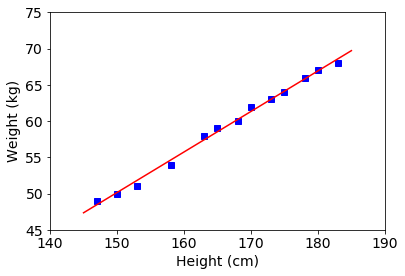

In [30]:
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
w = np.dot(np.linalg.pinv(np.dot(Xbar.T, Xbar)), np.dot(Xbar.T, y))

# weights
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(145, 185)
y0 = w_0 + w_1*x0

# Drawing
plt.plot(X, y, 'bs')
plt.plot(x0, y0, 'r-') # the fitting line
plt.axis([140, 190, 45, 75]) # xmin, xmax, ymin, ymax 
plt.xlabel('Height (cm)', fontsize = 14)
plt.ylabel('Weight (kg)', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

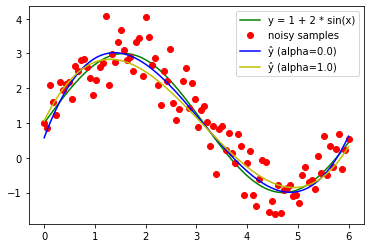

In [42]:
import numpy as np
import matplotlib.pyplot as plt


class RidgeRegression(object):
    
    def fit(self, X, y, alpha=0):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        G = alpha * np.eye(X.shape[1])
        self.params = np.dot(np.linalg.pinv(np.dot(X.T, X) + G), np.dot(X.T, y))

    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        return np.dot(X, self.params)


if __name__ == '__main__':
    # Create synthetic data
    X = np.linspace(0, 6, 100)
    y = 1 + 2 * np.sin(X)
    yhat = y + .5 * np.random.normal(size=len(X))

    # Plot synthetic data
    plt.plot(X, y, 'g', label='y = 1 + 2 * sin(x)')
    plt.plot(X, yhat, 'ro', label='noisy samples')

    # Create feature matrix
    tX = np.array([X]).T
    tX = np.concatenate((tX, np.power(tX, 2), np.power(tX, 3)), axis=1)

    # Plot regressions
    r = RidgeRegression()
    r.fit(tX, y)
    plt.plot(X, r.predict(tX), 'b', label=u'ŷ (alpha=0.0)')
    alpha = 1.0
    r.fit(tX, y, alpha)
    plt.plot(X, r.predict(tX), 'y', label=u'ŷ (alpha=%.1f)' % alpha)

    plt.legend()
    plt.show()